### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Генералов Даниил
##### Группа:   НПИбд-01-21

## Москва 2024
***

1. Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса. 

2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами при помощи стандартизованной оценки (Z-score) . Выберите параметры стандартизованной оценки таким образом, чтобы выбросы составляли от 1% до 10% всех точек набора данных. Если количество различных меток классов превышает 4, то уменьшите количество классов. 

3. Нормализуйте признаки набора данных методом, указанным в индивидуальном задании. 

4. Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

5. Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

6. Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К<10 и определите оптимальное значение параметра К с минимальной долей ошибок. 

7. Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок. 

8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов: 

• наивного байесовского классификатора 

• классификатора метода К ближайших соседей для значения К, определенного в п. 6. 

9. Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя. 

10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

# Вариант 4 

Automobile Data Set 

Название файла: imports-85.data 

Ссылка: https://archive.ics.uci.edu/ml/datasets/Automobile 

Первый признак: horsepower (столбец No 22) 

Второй признак: price (столбец No 26) 

Третий признак: compression-ratio (столбец No 21) 

Класс: symboling (столбец No 1) 

Метод обработки пропущенных значений – среднее значение класса  

Метод нормализации признаков – нормировка по норме L1  

Алгоритм снижения размерности данных – отбор на основе важности признаков (ExtraTreesClassifier)  

Метод валидации модели – стратифицированная кросс-валидация по 10 блокам  

Показатель качества модели – полнота (recall)  

# 1. открыть базу данных и прочитать значения

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
automobile = fetch_ucirepo(id=10) 

In [2]:
automobile['data'].keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [3]:
import pandas as pd
df = pd.DataFrame(automobile['data']['targets'])
df['horsepower'] = automobile['data']['features']['horsepower']
df['price'] = automobile['data']['features']['price']
df['compression-ratio'] = automobile['data']['features']['compression-ratio']
df

,symboling,horsepower,price,compression-ratio
0,3,111.0,13495.0,9.0
1,3,111.0,16500.0,9.0
2,1,154.0,16500.0,9.0
3,2,102.0,13950.0,10.0
4,2,115.0,17450.0,8.0
...,...,...,...,...
200,-1,114.0,16845.0,9.5
201,-1,160.0,19045.0,8.7
202,-1,134.0,21485.0,8.8
203,-1,106.0,22470.0,23.0


# 2. починка пропусков + объединение классов

In [4]:
df['symboling'].notna().all()

np.True_

In [5]:
df['horsepower'].notna().all()

np.False_

In [6]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df['horsepower'].notna().all()

np.True_

In [7]:
df['price'].notna().all()

np.False_

In [8]:
df['price'] = df['price'].fillna(df['price'].mean())
df['price'].notna().all()

np.True_

In [9]:
df['compression-ratio'].notna().all()

np.True_

In [10]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

In [11]:
df['symboling'].value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

In [12]:
df = df[df['symboling'] != -1]
df = df[df['symboling'] != -2]
df['symboling'].value_counts()

symboling
0    67
1    54
2    32
3    27
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import normalize

df[['horsepower', 'price', 'compression-ratio']] = normalize(df[['horsepower', 'price', 'compression-ratio']], norm='l1')
df

,symboling,horsepower,price,compression-ratio
0,3,0.008153,0.991186,0.000661
1,3,0.006679,0.992780,0.000542
2,1,0.009242,0.990218,0.000540
3,2,0.007254,0.992035,0.000711
4,2,0.006544,0.993001,0.000455
...,...,...,...,...
189,3,0.007697,0.991577,0.000727
190,3,0.008930,0.990227,0.000843
191,0,0.008201,0.991166,0.000634
192,0,0.004879,0.993470,0.001650


# 4. визуализация

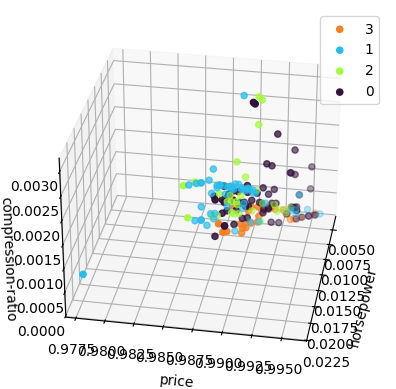

In [14]:
import matplotlib.pyplot as plt

CLASSES = df['symboling'].unique()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in CLASSES:
    df_k = df[df['symboling'] == i]
    ax.scatter(df_k['horsepower'], df_k['price'], df_k['compression-ratio'], c=df_k['symboling'], marker='o', label=i, cmap='turbo', vmin=0, vmax=4)

ax.set_xlabel('horsepower')
ax.set_ylabel('price')
ax.set_zlabel('compression-ratio')

ax.view_init(30, 10)

plt.legend()

plt.show()

# 5. снижение размерности

In [15]:
# dimensionality reduction using ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

FEATURES = ['horsepower', 'price', 'compression-ratio']

X = df[FEATURES]
y = df['symboling']

knn_model = ExtraTreesClassifier(n_estimators=1000, random_state=0)
knn_model.fit(X, y)

print(knn_model.feature_importances_)

[0.32045348 0.32348982 0.3560567 ]


In [16]:
feature_importances = list(zip(FEATURES, knn_model.feature_importances_))

feature_importances.sort(key=lambda x: x[1], reverse=True)

for label, importance in feature_importances:
    print(f"{label}: {importance}")

compression-ratio: 0.356056702512649
price: 0.3234898196852227
horsepower: 0.3204534778021283


In [17]:
df_2d = df.drop(feature_importances[-1][0], axis=1)
feature_importances.pop(-1)
df

,symboling,horsepower,price,compression-ratio
0,3,0.008153,0.991186,0.000661
1,3,0.006679,0.992780,0.000542
2,1,0.009242,0.990218,0.000540
3,2,0.007254,0.992035,0.000711
4,2,0.006544,0.993001,0.000455
...,...,...,...,...
189,3,0.007697,0.991577,0.000727
190,3,0.008930,0.990227,0.000843
191,0,0.008201,0.991166,0.000634
192,0,0.004879,0.993470,0.001650


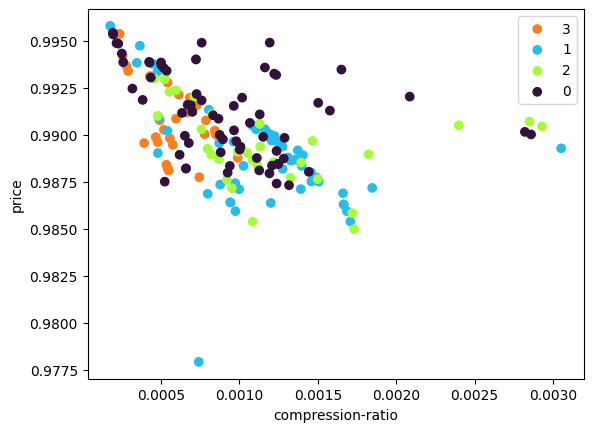

In [18]:
ax = plt.axes()

for i in CLASSES:
    df_k = df_2d[df_2d['symboling'] == i]
    ax.scatter(df_k[feature_importances[0][0]], df_k[feature_importances[1][0]], c=df_k['symboling'], marker='o', label=i, cmap='turbo', vmin=0, vmax=4)

ax.set_xlabel(feature_importances[0][0])
ax.set_ylabel(feature_importances[1][0])

plt.legend()

plt.show()

# 6. KNN-классификация

In [19]:
# k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



X = df_2d[list(map(lambda x: x[0], feature_importances))]
y = df_2d['symboling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31337)

best_k = 0
best_score = 0

for i in range(2, 10):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)

    score = knn_model.score(X_test, y_test)
    print(i, score)
    if score > best_score:
        best_score = score
        best_k = i

print(f"best k = {best_k}, score = {best_score}")

2 0.37777777777777777
3 0.3111111111111111
4 0.28888888888888886
5 0.4
6 0.35555555555555557
7 0.35555555555555557
8 0.4444444444444444
9 0.4666666666666667
best k = 9, score = 0.4666666666666667


# 7. отчет по классификации + матрица ошибок

In [20]:
from sklearn.metrics import classification_report

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.63      0.59        19
           1       0.44      0.58      0.50        12
           2       0.25      0.12      0.17         8
           3       0.33      0.17      0.22         6

    accuracy                           0.47        45
   macro avg       0.39      0.38      0.37        45
weighted avg       0.44      0.47      0.44        45



In [21]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, y_pred)).style.background_gradient(cmap='Blues')

,0,1,2,3
0,12,3,2,2
1,4,7,1,0
2,1,6,1,0
3,5,0,0,1


# 8. классификация в 3d

0.4888888888888889


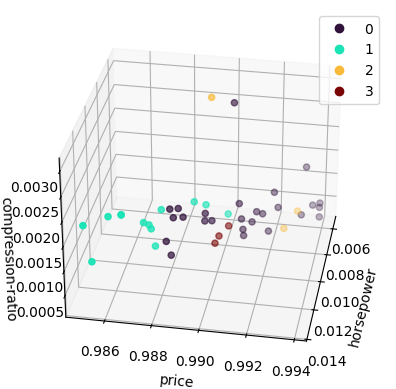

In [22]:
knn_3d_model = KNeighborsClassifier(n_neighbors=best_k)

X,y = df[FEATURES], df['symboling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31337)
knn_3d_model.fit(X_train, y_train)

score = knn_3d_model.score(X_test, y_test)
knn_predictions = knn_3d_model.predict(X_test)
print(score)

ax = plt.axes(projection='3d')

scatter = ax.scatter(X_test[FEATURES[0]], X_test[FEATURES[1]], X_test[FEATURES[2]], c=knn_predictions, cmap='turbo')

ax.set_xlabel(FEATURES[0])
ax.set_ylabel(FEATURES[1])
ax.set_zlabel(FEATURES[2])

plt.legend(*scatter.legend_elements())

ax.view_init(30, 10)

plt.show()

0.4444444444444444


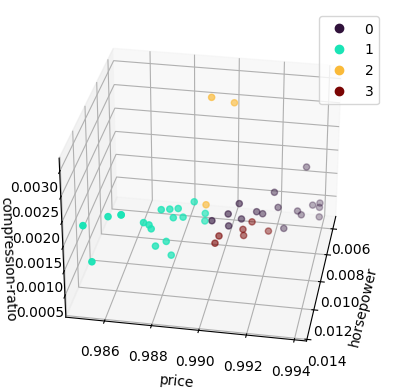

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X = df[FEATURES]
y = df['symboling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31337)

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

score = gnb_model.score(X_test, y_test)
gnb_predictions = gnb_model.predict(X_test)
print(score)

ax = plt.axes(projection='3d')

scatter = ax.scatter(X_test[FEATURES[0]], X_test[FEATURES[1]], X_test[FEATURES[2]], c=gnb_predictions, cmap='turbo')

ax.set_xlabel(FEATURES[0])
ax.set_ylabel(FEATURES[1])
ax.set_zlabel(FEATURES[2])

plt.legend(*scatter.legend_elements())

ax.view_init(30, 10)

plt.show()

# 9. качество модели (recall)

In [24]:
# calculate recall for each model
from sklearn.metrics import recall_score

knn_recall = recall_score(y_test, knn_predictions, average=None)
gnb_recall = recall_score(y_test, gnb_predictions, average=None)
print(knn_recall)
print(gnb_recall)

[0.73684211 0.5        0.125      0.16666667]
[0.52631579 0.58333333 0.         0.5       ]


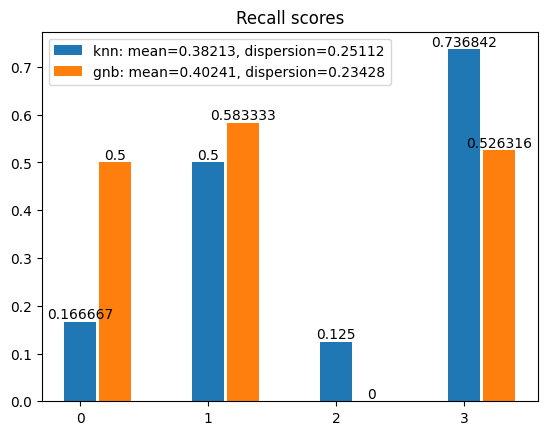

In [25]:
import numpy as np

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
width = 0.25
multiplier = 0
ax = plt.axes()
for klass, name in [(knn_recall, 'knn'), (gnb_recall, 'gnb')]:
    mean = round(float(np.mean(klass)), 5)
    dispersion = round(float(np.std(klass)), 5)
    offset = (width * multiplier)
    ax.bar(CLASSES + offset, klass, width=width, label=f"{name}: {mean=}, {dispersion=}")
    ax.set_xticks(CLASSES, labels=CLASSES)
    ax.bar_label(ax.containers[-1])
    multiplier += 1.1


plt.legend()
plt.title("Recall scores")
plt.show()

# 10. лучшее предсказание

In [26]:
klasses = [(knn_recall, 'knn'), (gnb_recall, 'gnb')]
best_klass = max(klasses, key=lambda x: np.mean(x[0]))
print(best_klass[1])

gnb


In [27]:
best_model = eval(best_klass[1] + '_model')

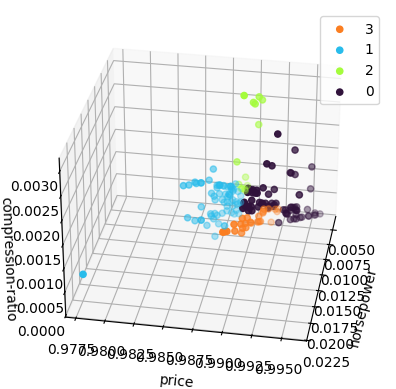

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = df[FEATURES]
y = best_model.predict(X)


for i in CLASSES:
    df_k = df[y == i]
    ax.scatter(df_k['horsepower'], df_k['price'], df_k['compression-ratio'], c=[i for _ in range(len(df_k))], marker='o', label=i, cmap='turbo', vmin=0, vmax=4)

ax.set_xlabel('horsepower')
ax.set_ylabel('price')
ax.set_zlabel('compression-ratio')

ax.view_init(30, 10)

plt.legend()

plt.show()